###  사전 준비

In [138]:
# 기본 패키지 import
import numpy as np
import pandas as pd
import scipy as sp

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [139]:
# 머신러닝 패키지 import
import statsmodels.api as sn # 안쓸껄?
import sklearn as sk

In [140]:
# 한글 설정 / 차트 마이너스 깨짐 현상 해결 / seaborn 화면 설정
from matplotlib import rc
import matplotlib.font_manager as fm

plt.rc('font', family='Malgun Gothic')
sns.set(font='Malgun Gothic', rc={'axes.unicode_minus':False}, style='darkgrid')

### 특성 공학 / 규제
### 데이터 준비

In [141]:
df = pd.read_csv('https://bit.ly/perch_csv')
df.tail()

,length,height,width
51,42.0,12.80,6.87
52,43.0,11.93,7.28
53,43.0,12.51,7.42
54,43.5,12.60,8.14
55,44.0,12.49,7.60


In [142]:
perch_full = df.to_numpy()
perch_full

array([[ 8.4 ,  2.11,  1.41],
       [13.7 ,  3.53,  2.  ],
       [15.  ,  3.82,  2.43],
       [16.2 ,  4.59,  2.63],
       [17.4 ,  4.59,  2.94],
       [18.  ,  5.22,  3.32],
       [18.7 ,  5.2 ,  3.12],
       [19.  ,  5.64,  3.05],
       [19.6 ,  5.14,  3.04],
       [20.  ,  5.08,  2.77],
       [21.  ,  5.69,  3.56],
       [21.  ,  5.92,  3.31],
       [21.  ,  5.69,  3.67],
       [21.3 ,  6.38,  3.53],
       [22.  ,  6.11,  3.41],
       [22.  ,  5.64,  3.52],
       [22.  ,  6.11,  3.52],
       [22.  ,  5.88,  3.52],
       [22.  ,  5.52,  4.  ],
       [22.5 ,  5.86,  3.62],
       [22.5 ,  6.79,  3.62],
       [22.7 ,  5.95,  3.63],
       [23.  ,  5.22,  3.63],
       [23.5 ,  6.28,  3.72],
       [24.  ,  7.29,  3.72],
       [24.  ,  6.38,  3.82],
       [24.6 ,  6.73,  4.17],
       [25.  ,  6.44,  3.68],
       [25.6 ,  6.56,  4.24],
       [26.5 ,  7.17,  4.14],
       [27.3 ,  8.32,  5.14],
       [27.5 ,  7.17,  4.34],
       [27.5 ,  7.05,  4.34],
       [27

#### 농어데이터
농어의 길이, 높이, 두께 --> 농어의 무게를 예측

무게 데이터

In [143]:
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0,
                        110.0, 115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 
                        130.0, 150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0,
                        197.0, 218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 
                        514.0, 556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 
                        820.0, 850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0, 1000.0])

In [144]:
len(perch_weight)

56

#### 훈련세트 / 데이터세트 나누기

In [145]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(perch_full, perch_weight, random_state=42)

In [146]:
print(train_input.shape)
print(test_input.shape)

(42, 3)
(14, 3)


In [147]:
print(test_target.shape)
print(train_target.shape)

(14,)
(42,)


#### 사이킷런 변환기

특성이 하나 이상일때 하나의 특성(새 회귀방정식)만드는 것

In [148]:
from sklearn.preprocessing import PolynomialFeatures

##### 예제

In [149]:
poly = PolynomialFeatures()
poly.fit([[2, 3]])
poly.transform([[2, 3]])


array([[1., 2., 3., 4., 6., 9.]])

In [150]:
poly.get_feature_names()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['1', 'x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

In [151]:
poly = PolynomialFeatures(include_bias=False)
poly.fit([[2, 3]])
poly.transform([[2, 3]])

array([[2., 3., 4., 6., 9.]])

In [152]:
poly.get_feature_names()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x0^2', 'x0 x1', 'x1^2']

##### 농어데이터 3개의 특징
트랜스포머로 특징을 분리

In [153]:
poly = PolynomialFeatures(include_bias=False)
poly.fit(train_input) # 입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
train_poly = poly.transform(train_input)
train_poly.shape

(42, 9)

In [154]:
poly.get_feature_names()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0', 'x1', 'x2', 'x0^2', 'x0 x1', 'x0 x2', 'x1^2', 'x1 x2', 'x2^2']

In [155]:
test_poly = poly.transform(test_input)
test_poly.shape

(14, 9)

#### 다중 회귀모델 훈련

In [156]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X=train_poly, y=train_target)
lr.score(X=train_poly, y=train_target)

0.9903183436982124

In [157]:
lr.score(X=test_poly, y=test_target)

0.9714559911594145

### 예측하기 위한 데이터도 변환

In [158]:
pred_x = [[50.0, 13.5, 9.2]]
poly_p = PolynomialFeatures(include_bias=False)
poly_p.fit(pred_x) # 입력되는 값이 몇개의 특징을 가지고 있는지 알려줌
pred_poly = poly.transform(pred_x)
pred_poly.shape

(1, 9)

In [159]:
pred_poly

array([[  50.  ,   13.5 ,    9.2 , 2500.  ,  675.  ,  460.  ,  182.25,
         124.2 ,   84.64]])

In [160]:
# 9개의 특성으로 예측해야 함
lr.predict(X=pred_poly)

array([1634.45893639])

#### 추가적인 내용

In [161]:
poly = PolynomialFeatures(degree=5, include_bias=False)
poly.fit(train_input)
train_poly = poly.transform(train_input)
test_poly = poly.transform(test_input)
train_poly.shape

(42, 55)

In [162]:
poly.get_feature_names()

C:\Users\admin\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


['x0',
 'x1',
 'x2',
 'x0^2',
 'x0 x1',
 'x0 x2',
 'x1^2',
 'x1 x2',
 'x2^2',
 'x0^3',
 'x0^2 x1',
 'x0^2 x2',
 'x0 x1^2',
 'x0 x1 x2',
 'x0 x2^2',
 'x1^3',
 'x1^2 x2',
 'x1 x2^2',
 'x2^3',
 'x0^4',
 'x0^3 x1',
 'x0^3 x2',
 'x0^2 x1^2',
 'x0^2 x1 x2',
 'x0^2 x2^2',
 'x0 x1^3',
 'x0 x1^2 x2',
 'x0 x1 x2^2',
 'x0 x2^3',
 'x1^4',
 'x1^3 x2',
 'x1^2 x2^2',
 'x1 x2^3',
 'x2^4',
 'x0^5',
 'x0^4 x1',
 'x0^4 x2',
 'x0^3 x1^2',
 'x0^3 x1 x2',
 'x0^3 x2^2',
 'x0^2 x1^3',
 'x0^2 x1^2 x2',
 'x0^2 x1 x2^2',
 'x0^2 x2^3',
 'x0 x1^4',
 'x0 x1^3 x2',
 'x0 x1^2 x2^2',
 'x0 x1 x2^3',
 'x0 x2^4',
 'x1^5',
 'x1^4 x2',
 'x1^3 x2^2',
 'x1^2 x2^3',
 'x1 x2^4',
 'x2^5']

In [163]:
lr.fit(train_poly, train_target)
lr.score(train_poly, train_target)

0.9999999999996176

In [164]:
lr.score(test_poly, y=test_target)

-144.40585108215134

#### 표준화 작업

입력값 - 평균 / 표준편차 -> 일정한 단위가 되도록

In [165]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_poly)

StandardScaler()

In [167]:
train_input

array([[19.6 ,  5.14,  3.04],
       [22.  ,  5.88,  3.52],
       [18.7 ,  5.2 ,  3.12],
       [17.4 ,  4.59,  2.94],
       [36.  , 10.61,  6.74],
       [25.  ,  6.44,  3.68],
       [40.  , 11.93,  7.11],
       [39.  , 12.43,  7.35],
       [43.  , 11.93,  7.28],
       [22.  ,  5.64,  3.52],
       [20.  ,  5.08,  2.77],
       [22.  ,  6.11,  3.52],
       [24.  ,  7.29,  3.72],
       [27.5 ,  7.17,  4.34],
       [43.  , 12.51,  7.42],
       [40.  , 11.73,  7.22],
       [24.  ,  6.38,  3.82],
       [21.  ,  5.92,  3.31],
       [27.5 ,  7.05,  4.34],
       [40.  , 12.38,  7.46],
       [32.8 , 10.03,  6.02],
       [26.5 ,  7.17,  4.14],
       [36.5 , 10.88,  6.86],
       [13.7 ,  3.53,  2.  ],
       [22.7 ,  5.95,  3.63],
       [15.  ,  3.82,  2.43],
       [37.  , 10.57,  6.37],
       [35.  , 11.49,  7.8 ],
       [28.7 ,  7.59,  4.64],
       [23.5 ,  6.28,  3.72],
       [39.  , 11.14,  6.  ],
       [21.  ,  5.69,  3.56],
       [23.  ,  5.22,  3.63],
       [22

In [168]:
train_poly

array([[1.96000000e+01, 5.14000000e+00, 3.04000000e+00, ...,
        7.42244501e+02, 4.38992857e+02, 2.59637799e+02],
       [2.20000000e+01, 5.88000000e+00, 3.52000000e+00, ...,
        1.50793507e+03, 9.02709432e+02, 5.40397483e+02],
       [1.87000000e+01, 5.20000000e+00, 3.12000000e+00, ...,
        8.21240709e+02, 4.92744425e+02, 2.95646655e+02],
       ...,
       [2.56000000e+01, 6.56000000e+00, 4.24000000e+00, ...,
        3.28023719e+03, 2.12015331e+03, 1.37034299e+03],
       [4.20000000e+01, 1.28000000e+01, 6.87000000e+00, ...,
        5.31239245e+04, 2.85126063e+04, 1.53032504e+04],
       [3.45000000e+01, 1.02600000e+01, 6.39000000e+00, ...,
        2.74661189e+04, 1.71060916e+04, 1.06537939e+04]])

In [169]:
train_scaled = ss.transform(train_poly)
test_scaled = ss.transform(test_poly)

In [170]:
train_scaled

array([[-1.01339619, -1.01007487, -1.01952321, ..., -0.76449499,
        -0.75967179, -0.75143746],
       [-0.73842893, -0.75254307, -0.74466913, ..., -0.73198449,
        -0.72731765, -0.71950111],
       [-1.11650891, -0.98919391, -0.97371419, ..., -0.76114089,
        -0.75592147, -0.74734146],
       ...,
       [-0.32597805, -0.51589222, -0.33238802, ..., -0.65673421,
        -0.64237495, -0.62509499],
       [ 1.55296488,  1.65572732,  1.17358328, ...,  1.45958191,
         1.19906225,  0.95977016],
       [ 0.6936922 ,  0.7717668 ,  0.8987292 , ...,  0.3701756 ,
         0.40321427,  0.43089551]])

### 규제

훈련세트에 치중해서 과대적합이 되지 않도록 해주는 작업 --> 릿지모델 / 라쏘모델

### 릿지회귀모델

In [171]:
from sklearn.linear_model import Ridge

ridge = Ridge()
ridge.fit(X=train_scaled, y=train_target)   # 훈련은 fit, score로 이 모델이 적합한지 보여줌
ridge.score(X=train_scaled, y=train_target)

0.9896101671037343

In [172]:
ridge.score(X=test_scaled, y=test_target)

0.9790693977615383

#### 하이퍼파라미터 alpha값 찾기

In [173]:
train_score = []
test_score = []

In [174]:
alpha_list = [0.001, 0.01, 0.1, 1, 10, 100]

for alpha in alpha_list: # 여섯번 훈련
    ridge = Ridge(alpha=alpha) # 알파값을 변경하면서 생성 6번
    ridge.fit(X=train_scaled, y=train_target)

    train_score.append(ridge.score(X=train_scaled, y=train_target))
    test_score.append(ridge.score(X=test_scaled, y=test_target))

In [175]:
train_score

[0.9930455252088513,
 0.9917809981250514,
 0.9903815817570366,
 0.9896101671037343,
 0.988728468997471,
 0.9841843235774494]

In [176]:
test_score

[0.9569388961546104,
 0.9800187936870526,
 0.9827976465386937,
 0.9790693977615383,
 0.9725329582461569,
 0.9627042641050291]

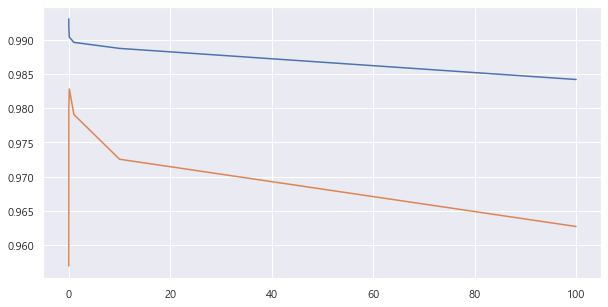

In [177]:
plt.figure(figsize=(10,5))
plt.plot(alpha_list, train_score)
plt.plot(alpha_list, test_score)
plt.show()

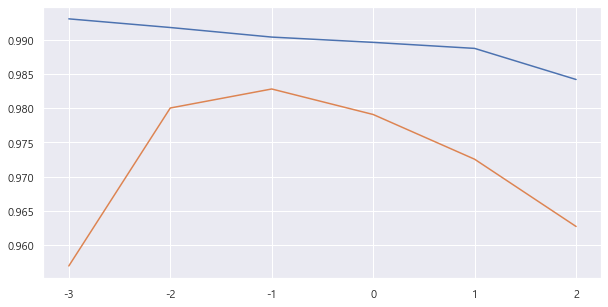

In [178]:
plt.figure(figsize=(10,5))
plt.plot(np.log10(alpha_list), train_score)
plt.plot(np.log10(alpha_list), test_score)
plt.show()

In [179]:
# alpha값은 -1 = 0.1이 되면 가장 적당
ridge = Ridge(alpha=0.1) # 알파값을 변경하면서 생성 6번
ridge.fit(X=train_scaled, y=train_target)

print(ridge.score(X=train_scaled, y=train_target))
print(ridge.score(X=test_scaled, y=test_target))

0.9903815817570366
0.9827976465386937


In [180]:
print(ridge.coef_)
print(ridge.intercept_)

[ 27.61933479  -1.64022156 -19.73256036  30.0306195   16.99800255
  17.83247301   4.46928273   3.87258547  22.8351822   19.50417483
  17.75985317  14.53122144  13.34875736   7.57294011  19.2573194
   5.12766348  -2.05671393  10.62376405  41.72322888   5.90722851
  14.93389276  -0.4506018   19.86035413   1.27084276  -1.00708878
  19.69043816  -1.15817017  -3.57357468  11.96629206  13.68484378
  -8.41738209  -9.97919956   8.42421045  45.51544903  -6.23828569
  13.36080282 -17.64759601  28.23566212  -6.56619234 -25.89115813
  37.3785331   -0.39779345 -20.82275921 -23.80607786  39.96650626
   0.10569722 -20.49768851 -21.74712923  -4.12579289  35.39224119
  -5.59195    -25.3889504  -23.93962265  -1.89229971  39.44235556]
400.8333333333333


#### 라쏘회귀모델

In [181]:
from sklearn.linear_model import Lasso

lasso = Lasso(alpha=10)
lasso.fit(X=train_scaled, y=train_target)
print(lasso.score(X=train_scaled, y=train_target))
print(lasso.score(X=test_scaled, y=test_target))

0.9888067471131867
0.9824470598706695


In [182]:
print(lasso.coef_)
print(lasso.intercept_)

[ 0.          0.          0.         12.14852453 55.44856399 42.23100799
  0.          0.         13.70596191  0.         43.2185952   5.7033775
 47.46254536  7.42309425 11.85823365  0.          0.         13.53038193
 21.22111356  0.          0.          0.          0.          0.
  0.         18.66993032  0.          0.          0.         15.81041778
  0.          0.          0.          0.          0.          0.
  0.          0.          0.          0.          0.          0.
  0.          0.         18.14672268  0.          0.          0.
  0.         15.51272953  0.          0.          0.          0.
  0.        ]
400.8333333333333
